Ritz values at step n of the Lanczos iteration are the stationary values of r(x) if x is restricted to $K_n$:

If x is restricted to K_n then $x \in K_n = Q_nR_n$ where $T_n = Q_n^*AQ_n$. Thus if $r(x) = 0$ then $(x^TAx)/(x^Tx) = 0 \implies Q_n^*AQ_n = 0$ (this was shown in a previous homework assignment for hendenberg matrices and $r(x)$ and holds similarly for tridiagonal $T_n$) $\implies  x$ is a ritz value at step n by algorithm 36.1.

Determining the smallest eigenvalue of A to six digits of accuracy by the Lanczos iteration.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Lanczos Iteration
def lanczos_iteration(A):
    N = len(A)
    B_0, q_0 = np.zeros(N), np.zeros(N)
    b = np.random.rand(N)
    q_n = b / np.linalg.norm(b)
    B_n = B_0
    T = np.zeros((N+1,N))
    eigs = []
    
    for n in range(12):
        v = A @ q_n
        a_n = q_n@v # a_n
        T[n][n] = a_n
        v = v - np.dot(B_0, q_0) - np.dot(a_n, q_n)
        
        B_n = np.linalg.norm(v)
        if n < N-1:
            T[n][n+1] = B_n 
            T[n+1][n] = B_n
        
        q_0 = q_n
        q_n = v / B_n
        B_0 = B_n
        
    # Figure out H matrix
    eigs.append(np.linalg.eigvals(T[:n].T[:n]))

    return eigs

In [4]:
# Set up an A matrix with 1's on super diagonal and sub diagonal
A = np.zeros((1000,1000))
for i in range(len(A)):
    A[i][i] = np.sqrt(i)
    for j in range(len(A)):
        if i == j-1 or i == j+1:
            A[i][j] = 1
        if i - j == 100 or j - i == 100:
            A[i][j] = 1
            
smallest_ritz = np.min(lanczos_iteration(A)) # Our min ritz value
smallest_eig = np.min(np.linalg.eigvals(A))
print("Smallest ritz found: ", smallest_ritz)
print("Smallest eigenvalue: ", smallest_eig) # real min eig value
print("Error: ", np.linalg.norm(smallest_ritz - smallest_eig)) # Error

Smallest ritz found:  -0.7591058811622008
Smallest eigenvalue:  -0.9139842842145924
Error:  0.15487840305239164


/home/daveyk/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


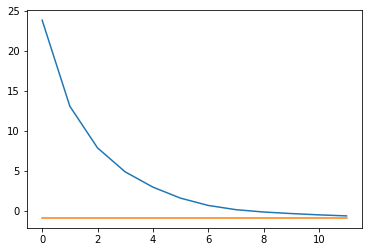

In [5]:
# Convergence of Lemnicscates
def modified_lanczos(A):
    N = len(A)
    B_0, q_0 = np.zeros(N), np.zeros(N)
    b = np.random.rand(N)
    q_n = b / np.linalg.norm(b)
    B_n = B_0
    T = np.zeros((N+1,N))
    eigs = []
    
    for n in range(13):
        v = A @ q_n
        a_n = q_n@v # a_n
        T[n][n] = a_n
        v = v - np.dot(B_0, q_0) - np.dot(a_n, q_n)
        
        B_n = np.linalg.norm(v)
        if n < N-1:
            T[n][n+1] = B_n 
            T[n+1][n] = B_n
        
        q_0 = q_n
        q_n = v / B_n
        B_0 = B_n
        
        # Figure out H matrix
        eigs.append(np.linalg.eigvals(T[:n].T[:n]))

    return np.real(eigs)

# Plots the convergence of the ritz values to the minimum eigenvalue
eigs = modified_lanczos(A)
smallest_eig = np.min(np.linalg.eigvals(A))
plt.plot([np.min(eigs[i]) for i in range(1,len(eigs))])
plt.plot([0, 11], [smallest_eig, smallest_eig])